Enter a image file name :: sunflower.jpg


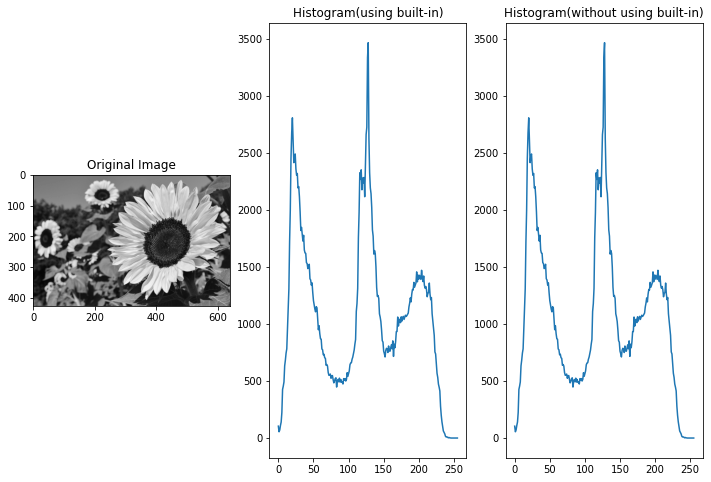

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculateHist(img):
    hist = np.zeros(256)
    rows, cols = img.shape
    for i in range(rows):
        for j in  range(cols):
            intensity = img[i,j]
            hist[intensity] += 1
    return hist

filepath = input("Enter a image file name :: ")
img = cv2.imread(filepath, 0)

if img is None:
    print("Failed to load image")
else:
    hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.plot(hist1)
    plt.title('Histogram(using built-in)')

    hist2 = calculateHist(img)
    plt.subplot(1, 3, 3)
    plt.plot(hist2)
    plt.title('Histogram(without using built-in)')

In [9]:
if sorted(hist1) == sorted(hist2):
    print("The lists have the same elements")
else:
    print("The lists do not have the same elements")

The lists have the same elements


Enter a image file name :: rose.jpg
Enter kernel size :: 7


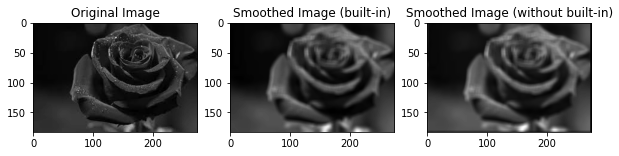

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def average_smooth(img, kernel_size):
    rows, cols = img.shape
    modified_image = np.zeros((rows,cols))
    
    for i in range(rows):
        for j in range(cols):
            sum1 = 0
            try:
                for p in range(-(kernel_size // 2), kernel_size // 2 + 1):
                    for q in range(-(kernel_size // 2), kernel_size // 2 + 1):
                        sum1 += img[(i+p), (j+q)]
            except IndexError as e:
                pass
            modified_image[i,j] = sum1 / (kernel_size ** 2)
    return modified_image
            
filepath = input("Enter a image file name :: ")
img1 = cv2.imread(filepath, 0)

if img1 is None:
    print("Failed to load image")
else:
    kernel_size = int(input("Enter kernel size :: "))
    smoothed_image1 = cv2.blur(img1, (kernel_size, kernel_size))
    smoothed_image2 = average_smooth(img1, kernel_size)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(smoothed_image1, cmap='gray')
    plt.title('Smoothed Image (built-in)')

    plt.subplot(1, 3, 3)
    plt.imshow(smoothed_image2, cmap='gray')
    plt.title('Smoothed Image (without built-in)')

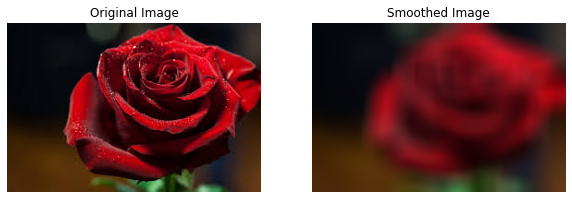

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def average_smoothing(image, kernel_size):
    # Define the kernel
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
   
    # Apply the filter
    smoothed_image = cv2.filter2D(image, -1, kernel)
   
    return smoothed_image

# Example usage
image_path = "rose.jpg"  # Path to your image
image = cv2.imread(image_path)

# Define kernel size (e.g., 3x3, 5x5, etc.)
kernel_size = 25

smoothed_image = average_smoothing(image, kernel_size)

# Convert images to RGB (matplotlib expects RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
smoothed_image_rgb = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)

# Display original and smoothed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image_rgb)
plt.title('Smoothed Image')
plt.axis('off')

plt.show()